# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Задачи:**
1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение: 
    * Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
3. Предложите алгоритм преобразования данных для решения задачи
4. Запрограммируйте этот алгоритм, применив матричные операции.
5. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

**План:**
1. Загрузить файлы, ознакомится с особенностями данных.
2. Переработка данных
3. Исследовательский анализ данных для проверки аномалий.
4. Ответьте на вопрос (Признаки умножают на обратимую матрицу...) и обоснуйте решение.
5. Предложите алгоритм преобразования данных для решения задачи.
6. Контрольная проверка работы линейной регрессии на исходных данных. (Метрика R2)
7. Проверка алгоритма:
    * Создание алгоритма
    * Проверка работы линейной регрессии на преобразованных данных. (Метрика R2)
8. Заключение.

**Содержание**<a id='toc0_'></a>    
1. [Загрузка данных](#toc1_)    
2. [Переработка](#toc2_)    
2.1. [Пропуски](#toc2_1_)    
2.2. [Дубликаты](#toc2_2_)    
2.3. [Тип данных](#toc2_3_)    
2.4. [Выводы](#toc2_4_)    
3. [EDA](#toc3_)    
4. [Умножение матриц](#toc4_)    
5. [Алгоритм преобразования](#toc5_)    
6. [Контроль](#toc6_)    
6.1. [Выборки](#toc6_1_)    
6.2. [R2](#toc6_2_)    
7. [Проверка алгоритма](#toc7_)    
7.1. [Случайная матрица](#toc7_1_)    
8. [Умножение матриц](#toc8_)    
9. [Дешифровка](#toc9_)    
10. [Заключение.](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rc('axes', titlesize='x-large')

In [3]:
RANDOM_STATE = 0

## 1. <a id='toc1_'></a>[Загрузка данных](#toc0_)

Загрузите и изучите данные.

In [4]:
path_local = 'datasets/'
path_platform = '/datasets/'
path_extra = ''

df_list = [
    'insurance.csv',
]

if os.path.exists(path_local) and all(list(map(os.path.exists, map(lambda x: path_local + x, df_list)))):
    df_dir = path_local
    print("Файлы найдены.")
elif os.path.exists(path_platform) and all(list(map(os.path.exists, map(lambda x: path_platform + x, df_list)))):
    df_dir = path_platform
    print("Файлы найдены.")
elif os.path.exists(path_extra) and all(list(map(os.path.exists, map(lambda x: path_extra + x, df_list)))):
    df_dir = path_extra
    print("Файлы найдены.")
elif all(list(map(os.path.exists, df_list))):
    df_dir = ''
    print("Файлы найдены.")
else:
    print("Директория не найдена. Файлы не найдены в текущей.")  

ins = pd.read_csv(os.path.join(df_dir, 'insurance.csv'))

Файлы найдены.


In [5]:
ins

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
ins['Страховые выплаты'].value_counts() # Регрессия? - да

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

**Выводы**

Пропусков нет. 5000 записей. 4 признака + ЦП: Страховые выплаты. ЦП принимает несколько числовых значений, значит задача регрессии.

## 2. <a id='toc2_'></a>[Переработка](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Пропуски](#toc0_)

In [8]:
ins.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

### 2.2. <a id='toc2_2_'></a>[Дубликаты](#toc0_)

In [9]:
ins.duplicated().sum()

153

In [10]:
ins.drop_duplicates(inplace=True)

### 2.3. <a id='toc2_3_'></a>[Тип данных](#toc0_)

In [11]:
ins['Возраст'] = ins['Возраст'].astype(int)

In [12]:
ins['Зарплата'] = ins['Зарплата'].astype(int)

### 2.4. <a id='toc2_4_'></a>[Выводы](#toc0_)

In [13]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int32
 2   Зарплата           4847 non-null   int32
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 189.3 KB


Пропусков нет, дубликаты удалены, типы данных стандартизированы.

## 3. <a id='toc3_'></a>[EDA](#toc0_)

In [14]:
ins['Пол'].value_counts()

0    2431
1    2416
Name: Пол, dtype: int64

In [15]:
ins['Возраст'].value_counts().count()

46

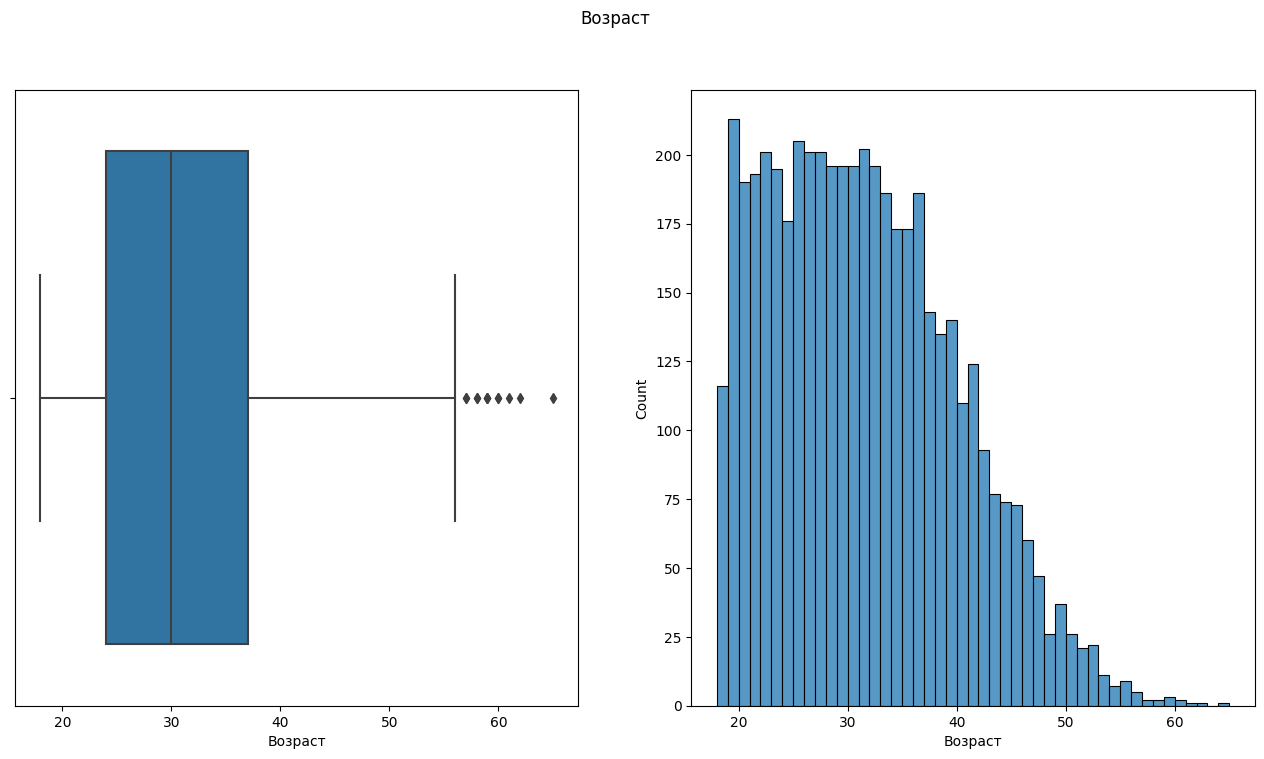

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(x=ins['Возраст'], ax=axs[0])
sns.histplot(x=ins['Возраст'], bins=ins['Возраст'].value_counts().count()+1)
plt.suptitle('Возраст');

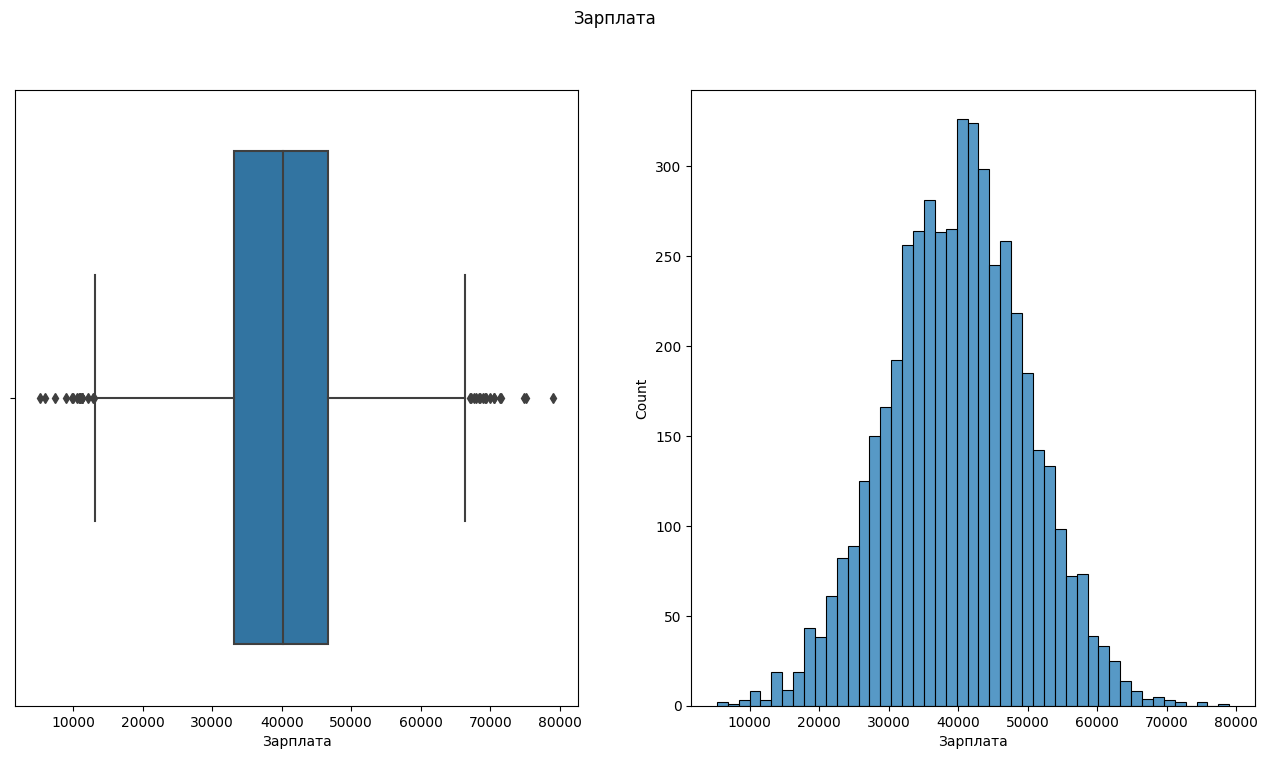

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(x=ins['Зарплата'], ax=axs[0])
sns.histplot(x=ins['Зарплата'])
plt.suptitle('Зарплата');

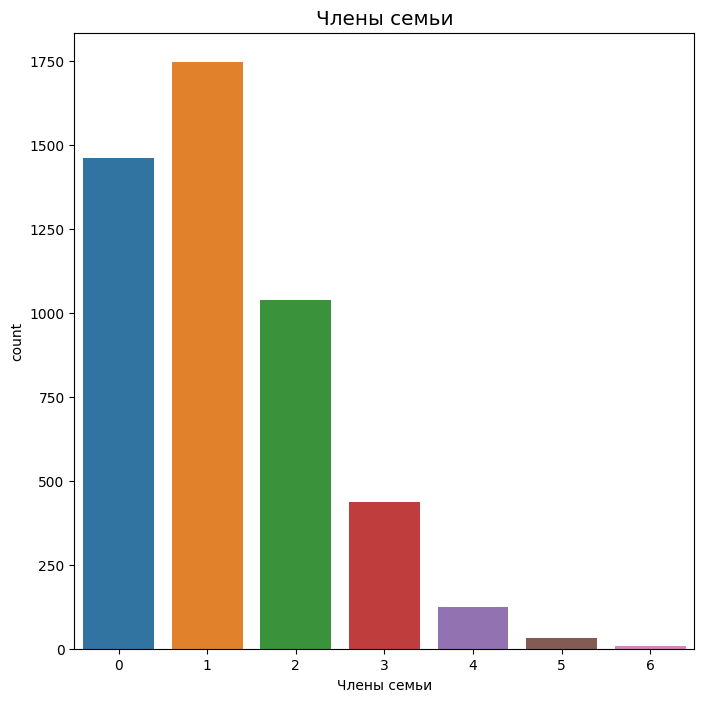

In [18]:
sns.countplot(x=ins['Члены семьи'])
plt.title('Члены семьи');

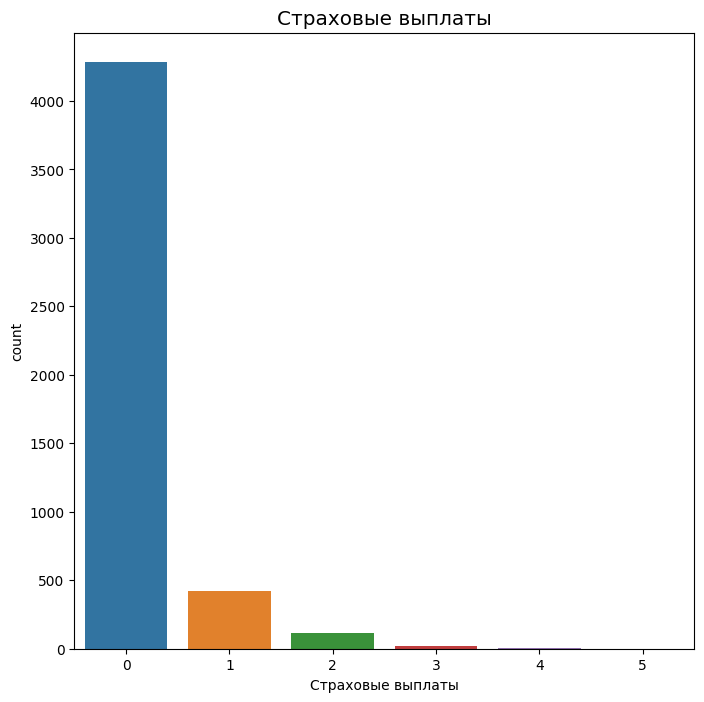

In [19]:
sns.countplot(x=ins['Страховые выплаты'])
plt.title('Страховые выплаты');

In [20]:
ins.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Выводы**

Аномалий нет, признаки распределены в целом логично. Зарплата распределена нормально.

В целом, учитывая что целью проекта является защита персональных данных клиентов, детализированный IDE неуместен, однако убедится в отсутствие явных аномалий среди признаков стоит для поддержания качества модели.

## 4. <a id='toc4_'></a>[Умножение матриц](#toc0_)

*Ответьте на вопрос и обоснуйте решение:*

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии в исходной задаче (нулевой элемент равен сдвигу)

- $w'$ - вектор весов линейной регрессии в преобразованной задаче

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 

Качество линейной регрессии не изменится. Параметры линейной регрессии в исходной задаче и в преобразованной связаны по формуле:

$$
w' = P^{-1} w
$$

**Правила преобразования:**

Для обоснования потребутся работать с умножением матриц, зафиксируем правила преобразований для матриц $A$, $B$, $C$ и единичной матрицы $E$

$$
A E = E A = A
$$

$$
A A^{-1} = A^{-1} A = E
$$

$$
(A B)^{-1} = B^{-1} A^{-1}
$$

$$
(A B)^{T} = B^T A^T
$$

$$
(AB)C = A(BC)
$$


**Обоснование:** 


Решая задачу обучения, мы минимизируем $MSE(Xw, y)$, т.е. ищем такой вектор $w$, для которого:

$$
a = y
$$

$$
y = X w
$$



Преобразовывая мы получаем:

$$
X^T y = X^T X w
$$

Матрица X^T X квадратная, если она обратимая, то мы можем получить формулу для $w$:

$$
(X^T X)^{-1} X^T y = (X^T X)^{-1} (X^T X) w
$$

$$
w = (X^T X)^{-1} X^T y
$$

Если мы домножаем $X$ на $P$, то решая задачу обучения получаем:

$$
y = (X P) w'
$$

Поскольку целевой признак не изменился, а каждый объект преобразован одинаковым образом (умножением на матрицу $P$), реузльтат регрессии - вектор $a$ на поменяется.

Найдём $w'$. Пусть $(XP) = X'$:

$$
y = X' w'
$$

Повторяя те же действия в результате имеем

$$
w' = (X'^T X')^{-1} (X')^T y
$$

Подставим $X'$ и преобразуем:

$$
w' = ((X P)^T (X P))^{-1} (X P) ^ T y
$$

$$
w' = ((P^T X^T X) P)^{-1} (X P) ^ T y
$$

$$
w' = P^{-1} (P^T (X^T X))^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$

$w = (X'^T X')^{-1} X'^T y$, следовательно:

$$
w' = P^{-1} w
$$

Это уравнение описывает, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

## 5. <a id='toc5_'></a>[Алгоритм преобразования](#toc0_)

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.


**Алгоритм**

1. Создадим случайную квадратную матрицу размером $(4,4)$ методом np.random.rand().
2. В рамках цикла while() проверим обратимость, в случае того если матрица не обратима сгенерируем новую по тем же правилам. Будем повторять пока не получим обратимую.
4. Умножим матрицу(массив) значений признаков на неё.

**Обоснование**

В аналитической задаче удалось показать, что умножение расширенной(с добавлением столбца единиц) матрицы признаков $X$ на обратимую матрицу $P$ (обратимость необходимо чтобы уравнение описывающее связь параметров до и после выполнялось) позволяет сохранить качество линейной регрессии вне зависимости от содержания матрицы $P$. 

Таким образом, для того чтобы зашифровать информацию о клиентах, достаточно умножить матрицу признаков на случайную матрицу, и мы сможем сохранить работу модели линейной регрессии, при этом сделав личные данные не узнаваемыми, без этой матрицы, которая будет выступать ключом шифрования. Т.К. целевой признак не меняется а каждая строка (объект) $X$ умножается на всю матрицу $P$, по правилам умножения матриц, сохраняется логическая связь между признаками и ЦП.

Однако расширение матрицы X столбцом единиц не обязательно для выполнения данной связи, и усложняет вычисления при практическом выполнении задачи. Для уменьшения необходимого количества вычислений, покажем это аналитически, для этого введём новые обозначения:

**Обозначения:**

- $X$ — матрица признаков (без нулевого столбца из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии в исходной задаче (без сдвига)

- $w_0$ - сдвиг

- $w'$ - вектор весов линейной регрессии в преобразованной задаче

Тогда:

$$
y = Xw + w_0
$$

$$
(y-w_0) = Xw
$$

$$
w = (X^t X)^{-1} X^t (y-w_0)
$$

Найдём $w'$. Сдвиг не меняется поскольку зависит от отношения между $Xw$ и $y$, а оно сохраняется для $(XP)w'$ и $y$.

$$
y = (X P)w' + w_0
$$

$$
y = X' w' + w_0
$$

$$
w' = ((X')^T X')^{-1} (X')^T (y-w_0)
$$

$$
w' = ((X P)^T (X P))^{-1} (X P) ^ T (y-w_0)
$$

$$
w' = P^{-1} (X^T X)^{-1} X^T (y-w_0)
$$

Получаем связь между $w'$ и $w$

$$
w' = P^{-1} w
$$

Таким образом $P$ вместо квадратной матрицы размером $4+1$ (количество признаков + столбец единиц) сокращается до $4$, что упрощает вычисления.

Для создания матрицы будем использовать `np.random.rand()`, т.к. он менее предсказуем чем `np.random.normal()`. В рамках проекта используется `np.random.seed(0)`, однако на практике этого следует избегать, посколько делает результат слишком лёгким для воспроизводства.

## 6. <a id='toc6_'></a>[Контроль](#toc0_)

### 6.1. <a id='toc6_1_'></a>[Выборки](#toc0_)

In [21]:
ins_trg = ins['Страховые выплаты'].values

In [22]:
ins_trg

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
ins_feat = ins.drop(['Страховые выплаты'], axis=1).values

In [24]:
ins_feat

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]], dtype=int64)

In [25]:
feat_train, feat_test, trg_train, trg_test = train_test_split(ins_feat, ins_trg, random_state=RANDOM_STATE)

In [26]:
scaler = StandardScaler()
scaler.fit(feat_train)
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

**Выводы**

Данные разбили на выборки, стандартизировали.

### 6.2. <a id='toc6_2_'></a>[R2](#toc0_)

In [27]:
model = LinearRegression()
model.fit(feat_train, trg_train)
control_score = model.score(feat_test, trg_test)
control_score

0.41145126195254356

**Выводы**

R2 на контрольной выборке без изменений признаков 0.411.

## 7. <a id='toc7_'></a>[Проверка алгоритма](#toc0_)

### 7.1. <a id='toc7_1_'></a>[Случайная матрица](#toc0_)

In [28]:
feat_train.shape

(3635, 4)

In [29]:
trg_train.shape

(3635,)

In [30]:
np.random.seed(0)

In [31]:
#ran_v = np.random.normal(size=ins_feat.T.shape)  #normal? В теории нормал, кажется что ранд менее предсказуем
#ran_v = np.random.rand(*ins_feat.T.shape) # глупости, нужна квадратная

ran_v = np.random.rand(ins_feat.shape[1], ins_feat.shape[1]) # Можно без этого, но так программе меньше думать.

while True:
    try:
        np.linalg.inv(ran_v)    
    except:    
        ran_v = np.random.rand(ins_feat.shape[1], ins_feat.shape[1])
    else: # try -> else, not done if except
        break
    
ran_v

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 ]])

In [32]:
np.linalg.inv(ran_v)

array([[-2.93661054,  0.62452847,  1.79269745,  1.09060329],
       [ 1.66428382, -0.43068264, -1.077603  ,  0.54137516],
       [ 3.929769  , -1.95008776, -0.51994879, -1.46025687],
       [-1.73862477,  2.09349729,  0.18396553, -0.19368226]])

## 8. <a id='toc8_'></a>[Умножение матриц](#toc0_)

In [33]:
feat_train_scrambled = feat_train @ ran_v
feat_test_scrambled = feat_test @ ran_v

In [34]:
model_scrambled = LinearRegression()
model_scrambled.fit(feat_train_scrambled, trg_train)
scrambled_score = model_scrambled.score(feat_test_scrambled, trg_test)
scrambled_score

0.41145126195254345

In [35]:
control_score

0.41145126195254356

In [36]:
round(control_score - scrambled_score, 15)

0.0

**Выводы**

По правилам умножения матриц, каждая строка умножается на всю матрицу, таким образом мы можем умножать все признаки сразу, или, как здесь, каждую выборку отдельно, результат не меняется.

Значения R2 совпадают до и после преобразования вплоть до 15 знака после запятой, разница знаков после 15 объясняется ошибками округления и поиском решения с помощью не аналитических инструментов.

## 9. <a id='toc9_'></a>[Дешифровка](#toc0_)

In [37]:
np.all(np.round(feat_train_scrambled @ np.linalg.inv(ran_v) , 10) == np.round(feat_train, 10))

True

In [38]:
np.allclose(feat_test_scrambled @ np.linalg.inv(ran_v), feat_test)

True

In [39]:
pd.DataFrame(
    np.round(np.concatenate((
        np.concatenate((scaler.inverse_transform(feat_train_scrambled @ np.linalg.inv(ran_v)), trg_train.reshape(-1, 1)), 1),
        np.concatenate((scaler.inverse_transform(feat_test_scrambled @ np.linalg.inv(ran_v)), trg_test.reshape(-1, 1)), 1)
    )), 10),
    columns=ins.columns)


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,-0.0,32.0,46800.0,0.0,0.0
1,-0.0,23.0,34600.0,1.0,0.0
2,1.0,36.0,26000.0,1.0,0.0
3,1.0,22.0,49800.0,0.0,0.0
4,-0.0,40.0,52000.0,0.0,0.0
...,...,...,...,...,...
4842,-0.0,45.0,41000.0,0.0,1.0
4843,-0.0,48.0,25700.0,1.0,1.0
4844,1.0,45.0,58700.0,1.0,1.0
4845,-0.0,37.0,39900.0,0.0,0.0


**Выводы**

Используя матричное умножение на матрицу обратную P, мы можем восстановить изначальную таблицу признаков, с очень маленьким отклонением, вызванным неточностью вычисления. Если, перед объединением, восстановить целевой признак, мы можем восстановить содержание оригинального Датафрейма. Результат не совпадает с оригиналом по индексу, ввиду того что перед разбиением на выборки индекс не сохраняли, однако содержит все записи, кроме отброшенных при переработке.

## 10. <a id='toc10_'></a>[Заключение.](#toc0_)

Свойства линейной регрессии и правила умножения матриц позволяют нам зашифровать данные клиентов, умножая матрицу признаков на случайную, обратимую, квадратную матрицу размера равного количеству признаков, таким образом, что не теряется качество работы линейной регрессии, при этом крайне сложно, не имея случайную матрицу восстановить оригинальные данные.